In [25]:
import tweepy
from datetime import datetime
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import csv
import pandas as pd
import matplotlib.pyplot as plt
import re
import helper_functions
import numpy as np
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import seaborn as sns

sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
plt.rcParams['figure.figsize'] = [12, 5]

In [2]:
tweets_df = pd.read_csv('wrong_predictions.csv')
tweets_df.head()

,Unnamed: 0,candidato,pred,tweet
0,206,bolsonaro,lula,- Documentário sobre a chegada das Águas do Ri...
1,284,bolsonaro,lula,- O Embaixador e o povo já decretaran! Neste d...
2,43,bolsonaro,lula,- Meu obrigado a Donald Trump pelo apoio! Sint...
3,1451,lula,bolsonaro,Fio com algumas das mentiras de Bolsonaro onte...
4,1344,lula,bolsonaro,"Quem nasce no asfalto, com energia elétrica e ..."


In [3]:
tweets_df.loc[tweets_df['pred'] == 'bolsonaro'].size

316

In [4]:
tweets_df.loc[tweets_df['pred'] == 'lula'].size

140

In [5]:
# Loading a list of portuguese stop words, since sklearn only has english words by default
with open('portuguese_stop_words.txt', 'r') as file:
    content = file.read()
    stop_words = re.split(" \n|\n", content)

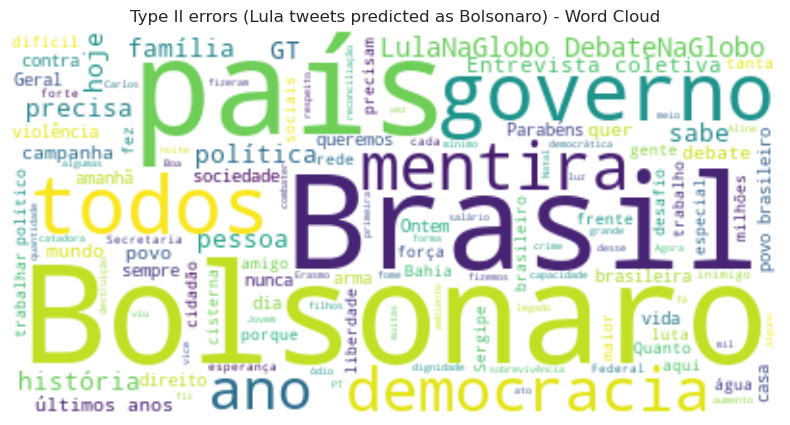

In [39]:
bolsonaro_text = " ".join(tweet for tweet in tweets_df.loc[tweets_df['pred'] == 'bolsonaro']['tweet'])

wordcloud = WordCloud(stopwords=stop_words, max_words=200, background_color='white', contour_width=3, contour_color='steelblue').generate(bolsonaro_text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Type II errors (Lula tweets predicted as Bolsonaro) - Word Cloud")
plt.show()
wordcloud.to_file('imgs/lula_typeII_wordcloud.png')

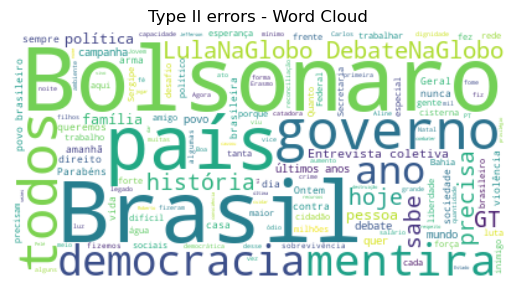

In [7]:
lula_text = " ".join(tweet for tweet in tweets_df.loc[tweets_df['pred'] == 'lula']['tweet'])

wordcloud = WordCloud(stopwords=stop_words, max_words=200, background_color='white', contour_width=3, contour_color='steelblue').generate(bolsonaro_text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Type II errors - Word Cloud")
plt.show()
#wordcloud.to_file('imgs/bolsonaro_word_cloud.png')

In [35]:
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, min_df=0.03, max_df=0.99)
tfidf_wrong_bolsonaro = tfidf_vectorizer.fit_transform(tweets_df.loc[tweets_df['pred'] == 'lula']['tweet'])
most_important = {k: v for k, v in sorted(tfidf_vectorizer.vocabulary_.items(), key=lambda item : item[1])}


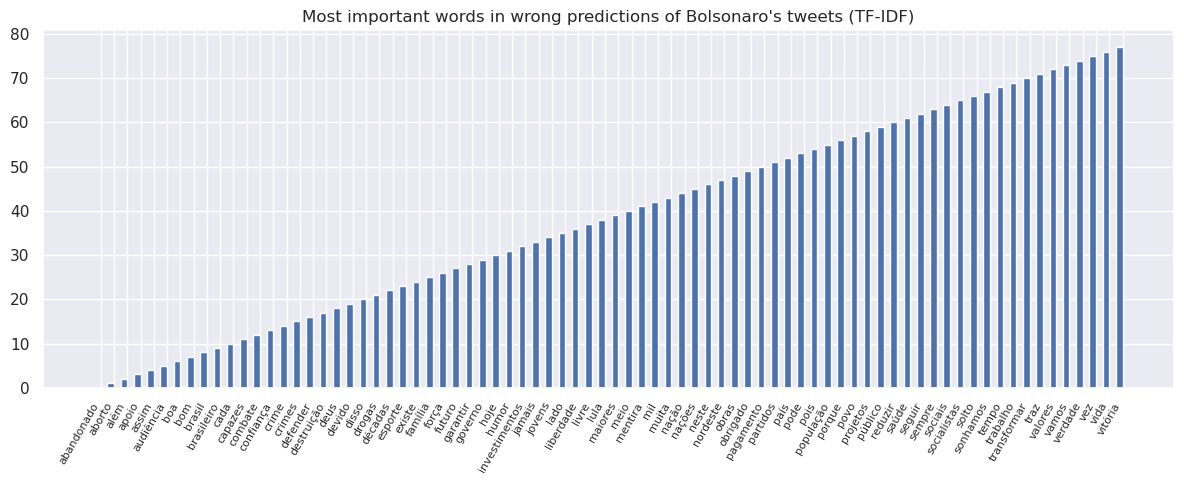

In [36]:
width = 1.5
fig, ax = plt.subplots()
feature_names = [item[0] for item in most_important.items()]
values = [item[1] for item in most_important.items()]
bottom = np.arange(len(feature_names)*3, step=3)
p = ax.bar(bottom, list(values), width=width, align='edge')
plt.xticks(bottom+width, list(feature_names), rotation=60, ha='right')
plt.tick_params(axis='x', which='major', labelsize=8)
plt.title('Most important words in wrong predictions of Bolsonaro\'s tweets (TF-IDF)')
plt.tight_layout()
plt.savefig('Most important words in wrong predictions of Bolsonaro\'s tweets.png', format='png')


In [37]:
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, min_df=0.03, max_df=0.99)
tfidf_wrong_lula = tfidf_vectorizer.fit_transform(tweets_df.loc[tweets_df['pred'] == 'bolsonaro']['tweet'])
most_important = {k: v for k, v in sorted(tfidf_vectorizer.vocabulary_.items(), key=lambda item : item[1])}

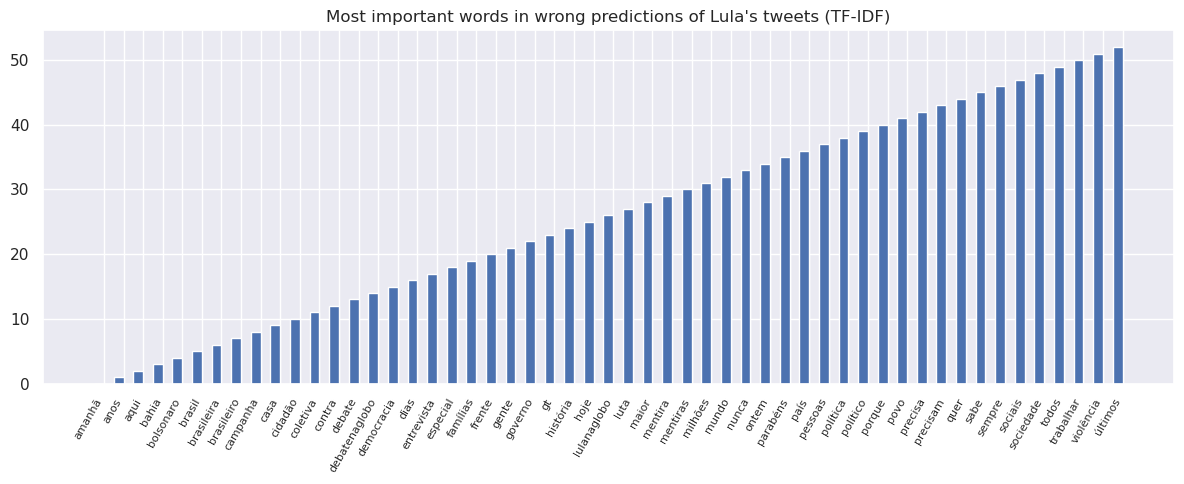

In [38]:
width = 1.5
fig, ax = plt.subplots()
feature_names = [item[0] for item in most_important.items()]
values = [item[1] for item in most_important.items()]
bottom = np.arange(len(feature_names)*3, step=3)
p = ax.bar(bottom, list(values), width=width, align='edge')
plt.xticks(bottom+width, list(feature_names), rotation=60, ha='right')
plt.tick_params(axis='x', which='major', labelsize=8)
plt.title('Most important words in wrong predictions of Lula\'s tweets (TF-IDF)')
plt.tight_layout()
plt.savefig('Most important words in wrong predictions of Lula\'s tweets.png', format='png')